# Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data Extraction from Posters/Ads

In [3]:
poster_features = pd.read_csv('poster_features.csv')

In [4]:
poster_features.head()

,id,category,brand,shop/company/advertiser,cost,offertype,no_of_product,location,online_stores,description_language,slogan_language,color_of_product,color_of_poster,partner,Unique feature,description,slogan,no_of_para
0,mobile1,mobile,multiple,sangeetha,multiple,no,15,both,shop_website,english,no,multicolor,orange,finance,NaN,nil,nil,NaN
1,mobile2,mobile,multiple,amazon,multiple,"offertype1, offertype7, offertype8",15,online,amazon,english,english,multicolor,orange,no,extra accessories,NaN,Fabulous offers on fantastic phones,NaN
2,mobile3,mobile,oneplus,own_store,nil,offertype1,2,both,"company_website, amazon",english,no,"blue, black",white,electronic_shop,NaN,NaN,nil,NaN
3,mobile4,mobile,nokia,nokia,multiple,"offertype1, offertype7",5,online,company_website,english,no,multicolor,blue,finance,NaN,NaN,nil,NaN
4,mobile5,mobile,multiple,flipkart,multiple,offertype1,5,online,flipkart,english,hindi,multicolor,whitegrey,finance,big billion days,NaN,Now India will be free from budget,NaN


In [5]:
attribute_list = ['category',
				'brand',
				'shop/company/advertiser',
				'cost',
				'offertype',
				'no_of_product',
				'location',
				'online_stores',
				'description_language',
				'slogan_language',
				'color_of_product',
				'color_of_poster',
				'partner',
				'unique_feature',
				'description',
				'slogan',
				]

## About Attributes Extracted

In [6]:
category = {'category': ['mobile', 
						 'accessory', 'accessory_watch', 'accessory_camera', 'accessory_furniture',
						 'clothing_adult', 'clothing_kid',
						 'food_organic', 'food_fast',
						 'food_beverage', 'food_dessert',
						 ]
}

brand = {'brand': ['multiple', 'single']}
# single - their own brand

shop = {'shop': ['own_shop', 'online', 'other_shop']}

cost = {'cost': ['nil', 'single', 'multiple']}

offertype = {'offertype': ['no',
						   'offertype1',
						   'offertype2',
						   'offertype3',
						   'offertype4',
						   'offertype5',
						   'offertype6',
						   'offertype7',
						   'offertype8']}
'''
offertype1 - x% offer on single product
offertype2 - x% offer on all products
offertype3 - coupons, vouchers, cashback
offertype4 - buy x and get y
offertype5 - win x prize 
offertype6 - combo
offertype7 - EMI options
offertype8 - exchange offers
'''

location = {'location': ['both', 'online']}

online_stores = {'online_stores': ['offline',
								   'shop_website',
								   'company_website'
								   'amazon',
								   'flipkart',
								   'express',
								   'big_basket',
								   'zomato',
								   'swiggy']}

description_language = {'description_language': ['no', 'english']}

slogan_language = {'slogan_language':['no', 'english']}

color_of_poster = {'color_of_poster': ['multicolor',
									   'blue', 'black',
									   'white', 'purple',
									   'whitegrey', 'pink',
									   'orange', 'yellow',
									   'red', 'sandal']}


partner = {'partner': ['no', 'finance', 'electronic_shop', 'gov_india']}

no_of_product = range(0, 200)

# Data Analysis on Responses 

In [7]:
mobile = pd.read_csv('mobile.csv')
food = pd.read_csv('food.csv')
clothing = pd.read_csv('clothing.csv')
accessory = pd.read_csv('accessory.csv')

## Mobile

In [8]:
mobile.head()

,Feedback on Mobile Image ID 1,Feedback on Mobile Image ID 2,Feedback on Mobile Image ID 3,Feedback on Mobile Image ID 4,Feedback on Mobile Image ID 5,What are the posters/ads did you liked/preferred?
0,"Offers, Display of Products, Design","Offers, Brand, Display of Products, Advertiser","Offers, Brand, Advertiser","Offers, Display of Products, Design","Offers, Brand, Display of Products, Advertiser","Mobile Image ID 1, Mobile Image ID 5"
1,"Display of Products, Design","Offers, Brand, Display of Products, Design",Brand,Design,"Offers, Brand, Display of Products, Design",Mobile Image ID 5
2,"Offers, Brand, Display of Products, Design, Ad...","Offers, Brand, Display of Products, Design, Ad...","Offers, Brand, Display of Products, Design, Ad...","Offers, Brand, Display of Products, Design, Ad...","Offers, Brand, Display of Products, Design, Ad...",Mobile Image ID 5
3,"Offers, Brand, Display of Products, Design","Offers, Brand, Display of Products, Design, Ad...","Offers, Brand, Display of Products, Design, Ad...","Offers, Brand, Display of Products, Advertiser","Offers, Brand, Display of Products, Advertiser","Mobile Image ID 1, Mobile Image ID 2, Mobile I..."
4,Nothing attracted me,"Offers, Design, Advertiser","Offers, Brand, Display of Products, Design, Ad...",Model,"Offers, Display of Products, Design, Advertiser","Mobile Image ID 2, Mobile Image ID 3, Mobile I..."


In [9]:
mobile.columns

Index(['Feedback on Mobile Image ID 1', 'Feedback on Mobile Image ID 2',
       'Feedback on Mobile Image ID 3', 'Feedback on Mobile Image ID 4',
       'Feedback on Mobile Image ID 5',
       'What are the posters/ads did you liked/preferred?'],
      dtype='object')

In [10]:
mobile = mobile.rename(columns = {'Feedback on Mobile Image ID 1': 'id1_feature', 
                                  'Feedback on Mobile Image ID 2': 'id2_feature',
                                  'Feedback on Mobile Image ID 3': 'id3_feature',
                                  'Feedback on Mobile Image ID 4': 'id4_feature',
                                  'Feedback on Mobile Image ID 5': 'id5_feature',
                                  'What are the posters/ads did you liked/preferred?': 'id'})

Text(0.5, 1.0, 'Combinations of Images')

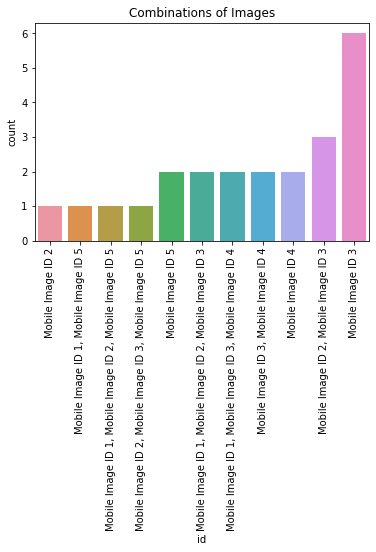

In [11]:
sns.countplot(mobile['id'], order = mobile['id'].value_counts(ascending=True).index)
plt.xticks(rotation=90)
plt.title('Combinations of Images')

In [12]:
mobile['id1'] = mobile['id'].apply(lambda x: 1 if '1' in str(x) else 0)
mobile['id2'] = mobile['id'].apply(lambda x: 1 if '2' in str(x) else 0)
mobile['id3'] = mobile['id'].apply(lambda x: 1 if '3' in str(x) else 0)
mobile['id4'] = mobile['id'].apply(lambda x: 1 if '4' in str(x) else 0)
mobile['id5'] = mobile['id'].apply(lambda x: 1 if '5' in str(x) else 0)

In [13]:
ids = mobile.iloc[:, 6:]

In [14]:
# for i in range(1, 6):
#     print(ids['id' + str(i)].value_counts(ascending=True))

In [15]:
sns.set_palette('Pastel1')

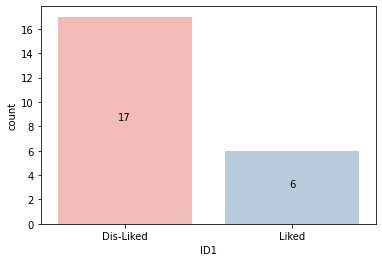

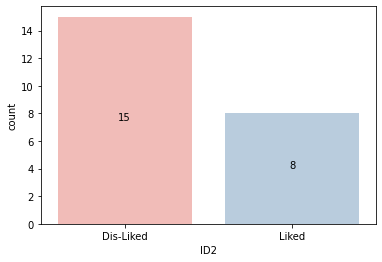

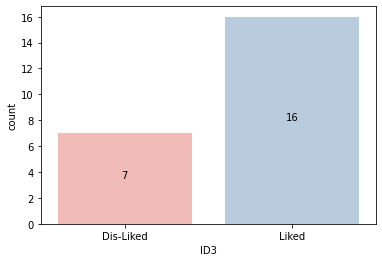

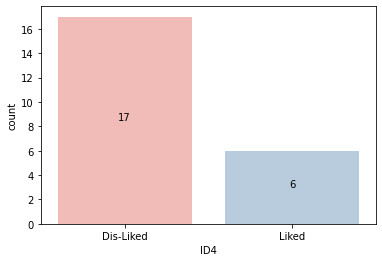

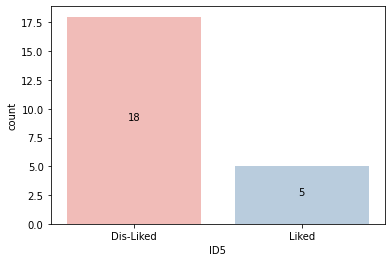

In [16]:
for i in ids.columns:
    ax = sns.countplot(ids[i])
    plt.xticks([0, 1], ['Dis-Liked', 'Liked'])
    plt.xlabel(i.upper())
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height/2,
                '{:1}'.format(height),
                ha="center")
    plt.show()

### **Insights for Mobile**

####  Order of Image ID liked
      
      3 > 2 > 1 = 4 > 5

---
####  **Mobile ID 3 has been attracted and 16 out of 23 people choosed it as their most liked adversitement**

---

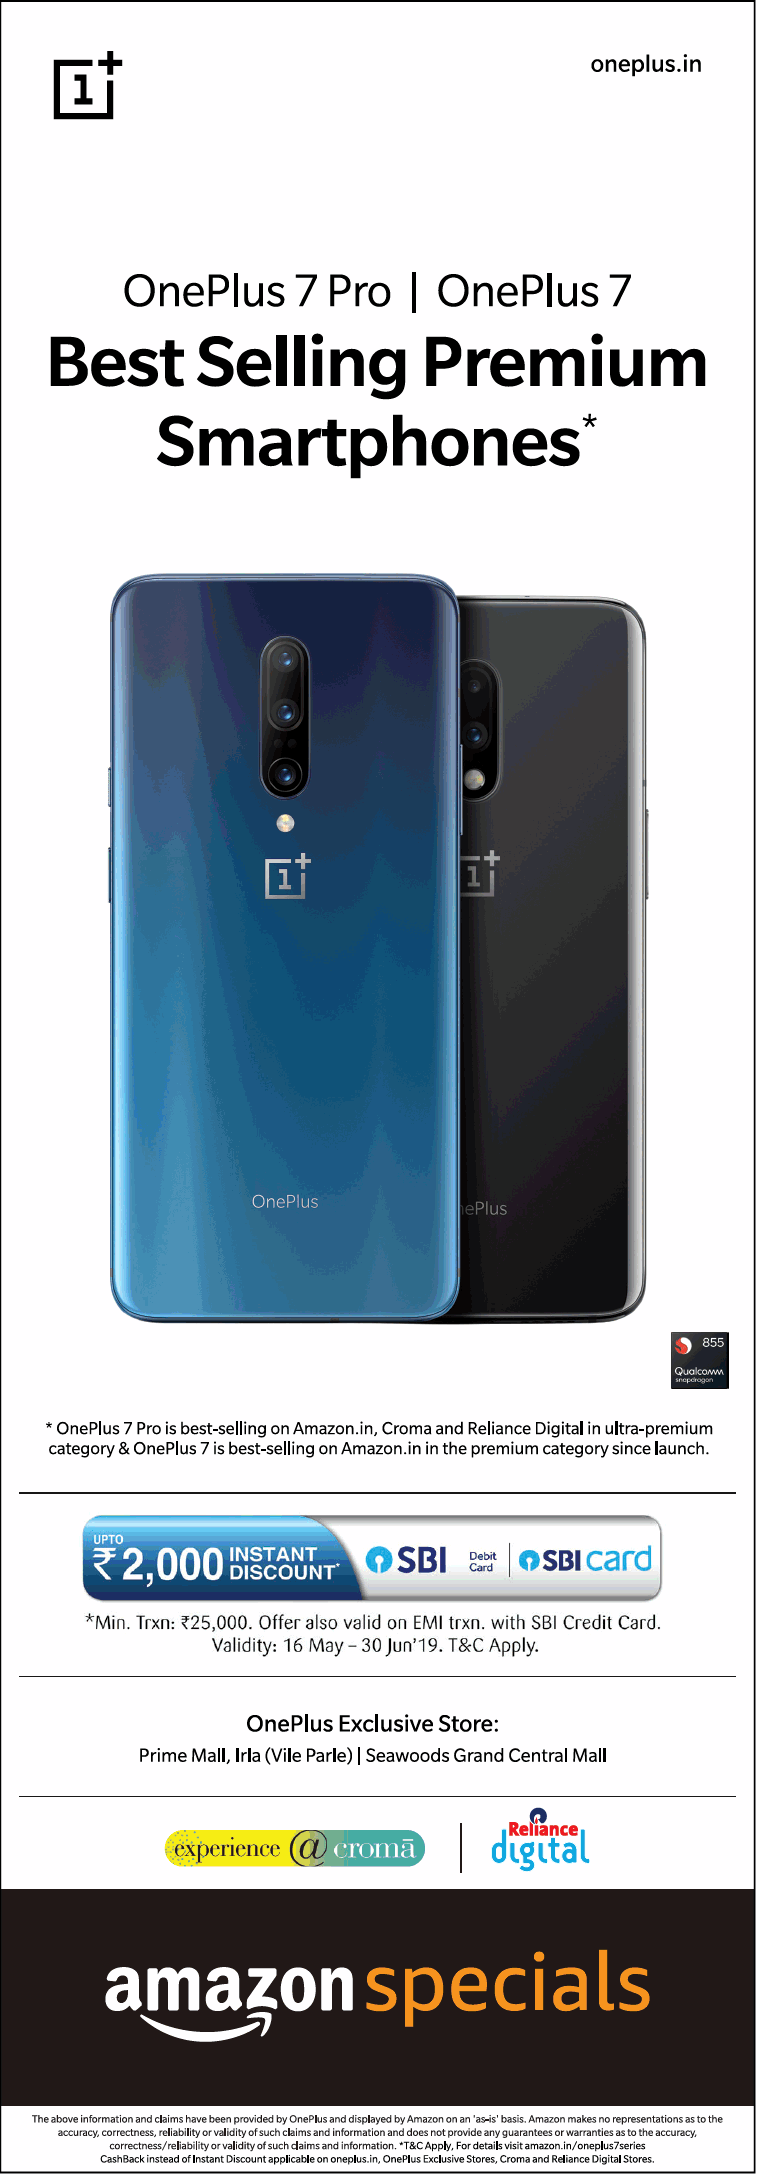


In [17]:
# from PIL import Image 
# from IPython.display import display

# im = Image.open('Posters(Ads)/mobile_phones/mobile3.png')  
# display(im) 

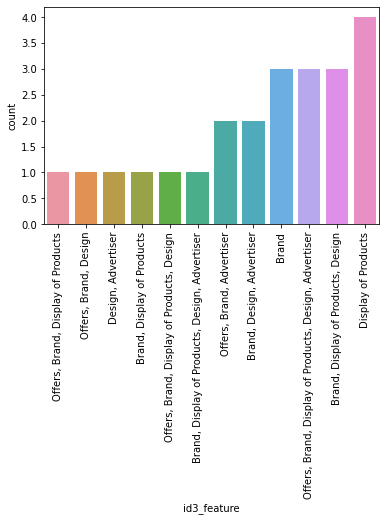

In [18]:
sns.countplot(mobile['id3_feature'], order = mobile['id3_feature'].value_counts(ascending=True).index)
plt.xticks(rotation=90)
plt.show()

In [19]:
img3_feature = mobile[['id3_feature', 'id3']]

In [20]:
img3_feature.head()

,id3_feature,id3
0,"Offers, Brand, Advertiser",0
1,Brand,0
2,"Offers, Brand, Display of Products, Design, Ad...",0
3,"Offers, Brand, Display of Products, Design, Ad...",1
4,"Offers, Brand, Display of Products, Design, Ad...",1


In [21]:
img3_feature['offers'] = img3_feature['id3_feature'].apply(lambda x: 1 if 'offer' in x.lower() else 0)
img3_feature['brand'] = img3_feature['id3_feature'].apply(lambda x: 1 if 'brand' in x.lower() else 0)
img3_feature['display_of_products'] = img3_feature['id3_feature'].apply(lambda x: 1 if 'display of products' in x.lower() else 0)
img3_feature['design'] = img3_feature['id3_feature'].apply(lambda x: 1 if 'design' in x.lower() else 0)
img3_feature['advertiser'] = img3_feature['id3_feature'].apply(lambda x: 1 if 'advertiser' in x.lower() else 0)

In [22]:
img3_feature.columns

Index(['id3_feature', 'id3', 'offers', 'brand', 'display_of_products',
       'design', 'advertiser'],
      dtype='object')

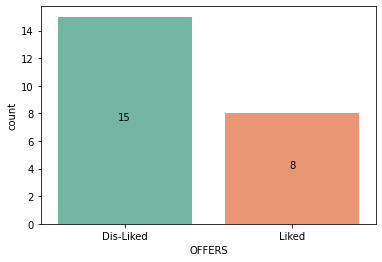

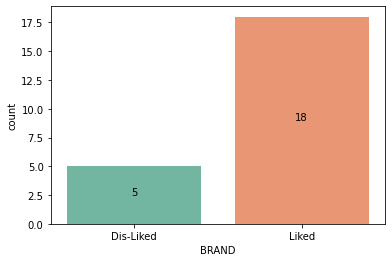

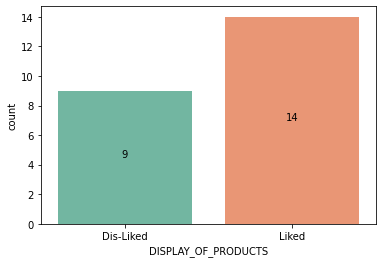

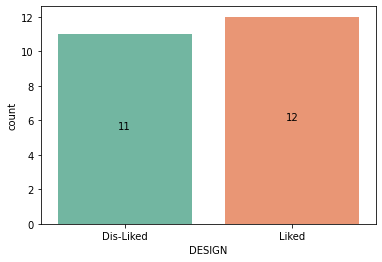

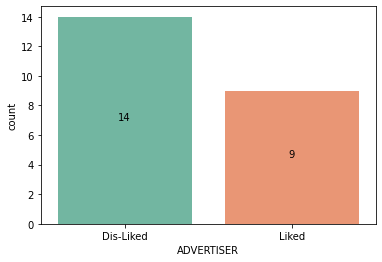

In [23]:
features = ['offers', 'brand', 'display_of_products',
              'design', 'advertiser']

for i in features:
    ax = sns.countplot(img3_feature[i], palette = "Set2")
    plt.xticks([0, 1], ['Dis-Liked', 'Liked'])
    plt.xlabel(i.upper())
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height/2,
                '{:1}'.format(height),
                ha="center")
    plt.show()

### **Insights for Mobile**

### Order of features liked by people

    1.   Brand
    2.   Display of Product
    3.   Design


---


### **18 people was attracted by brand. At second 14 people liked the simple display of product and 12 goes for design model**


---



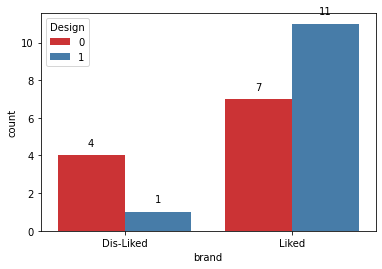

In [24]:
ax = sns.countplot(x='brand', hue='design', data=img3_feature, palette='Set1')
ax.legend(title="Design")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.5,
            '{:1}'.format(height),
            ha="center")
    
plt.xticks([0, 1], ['Dis-Liked', 'Liked'])
plt.show()

In [25]:
df = poster_features.copy()

In [26]:
df[df['id'] == 'mobile3']

,id,category,brand,shop/company/advertiser,cost,offertype,no_of_product,location,online_stores,description_language,slogan_language,color_of_product,color_of_poster,partner,Unique feature,description,slogan,no_of_para
2,mobile3,mobile,oneplus,own_store,nil,offertype1,2,both,"company_website, amazon",english,no,"blue, black",white,electronic_shop,NaN,NaN,nil,NaN


In [27]:
attributes = df[df['id'] == 'mobile3'].reset_index(drop=True).T.to_dict()

In [28]:
successful_features = attributes[0]

In [29]:
# Attributes for Most Liked Mobile Advertisement
successful_features

{'Unique feature': nan,
 'brand': 'oneplus',
 'category': 'mobile',
 'color_of_poster': 'white',
 'color_of_product': 'blue, black',
 'cost': 'nil',
 'description': nan,
 'description_language': 'english',
 'id': 'mobile3',
 'location': 'both',
 'no_of_para': nan,
 'no_of_product': '2',
 'offertype': 'offertype1',
 'online_stores': 'company_website, amazon',
 'partner': 'electronic_shop',
 'shop/company/advertiser': 'own_store',
 'slogan': 'nil',
 'slogan_language': 'no'}

In [30]:
best_features = {}

In [31]:
best_features['mobile'] = successful_features

## Food

In [32]:
food.head()

,Feedback on Food Image ID 1,Feedback on Food Image ID 2,Feedback on Food Image ID 3,Feedback on Food Image ID 4,Feedback on Food Image ID 5,What are the posters/ads did you liked/preferred?
0,Display of Products,"Offers, Brands, Display of Products","Brands, Display of Products, Adversiter","Offers, Brands, Display of Products, Adversiter",Display of Products,"Food Image ID 2, Food Image ID 3, Food Image ID 4"
1,"Brands, Adversiter","Offers, Brands",Brands,"Brands, Display of Products","Offers, Brands","Food Image ID 1, Food Image ID 2, Food Image ID 3"
2,"Brands, Display of Products","Brands, Adversiter","Brands, Adversiter","Offers, Brands, Display of Products","Brands, Display of Products","Food Image ID 3, Food Image ID 4, Food Image ..."
3,"Brands, Display of Products","Brands, Display of Products","Brands, Display of Products, Adversiter","Offers, Brands, Display of Products, Adversiter","Brands, Display of Products, Adversiter",Food Image ID 1
4,"Brands, Display of Products, Adversiter","Brands, Display of Products, Adversiter","Brands, Display of Products, Adversiter","Offers, Brands","Offers, Display of Products","Food Image ID 3, Food Image ID 5"


In [33]:
food.columns

Index(['Feedback on Food Image ID 1', 'Feedback on Food Image ID 2',
       'Feedback on Food Image ID 3', 'Feedback on Food Image ID 4',
       'Feedback on Food Image ID 5',
       'What are the posters/ads did you liked/preferred?'],
      dtype='object')

In [34]:
food = food.rename(columns = {'Feedback on Food Image ID 1': 'id1_feature', 
                                  'Feedback on Food Image ID 2': 'id2_feature',
                                  'Feedback on Food Image ID 3': 'id3_feature',
                                  'Feedback on Food Image ID 4': 'id4_feature',
                                  'Feedback on Food Image ID 5': 'id5_feature',
                                  'What are the posters/ads did you liked/preferred?': 'id'})

Text(0.5, 1.0, 'Combinations of Images')

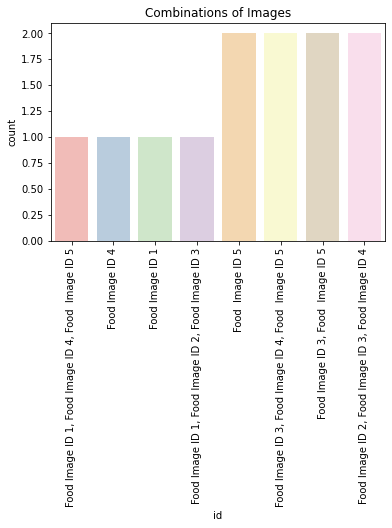

In [35]:
sns.countplot(food['id'], order = food['id'].value_counts(ascending=True).index)
plt.xticks(rotation=90)
plt.title('Combinations of Images')

In [36]:
food['id1'] = food['id'].apply(lambda x: 1 if '1' in str(x) else 0)
food['id2'] = food['id'].apply(lambda x: 1 if '2' in str(x) else 0)
food['id3'] = food['id'].apply(lambda x: 1 if '3' in str(x) else 0)
food['id4'] = food['id'].apply(lambda x: 1 if '4' in str(x) else 0)
food['id5'] = food['id'].apply(lambda x: 1 if '5' in str(x) else 0)

In [37]:
ids = food.iloc[:, 6:]

In [38]:
ids.head()

,id1,id2,id3,id4,id5
0,0,1,1,1,0
1,1,1,1,0,0
2,0,0,1,1,1
3,1,0,0,0,0
4,0,0,1,0,1


In [39]:
# for i in range(1, 6):
#     print(ids['id' + str(i)].value_counts(ascending=True))

In [40]:
sns.set_palette('Pastel1')

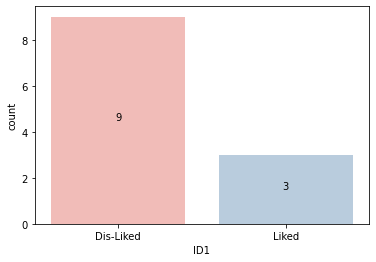

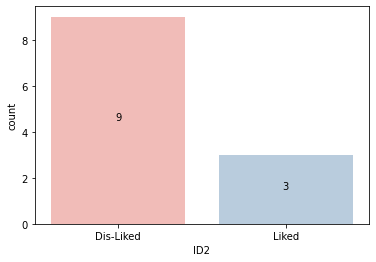

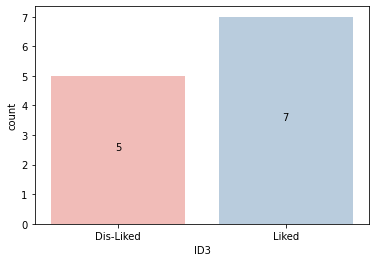

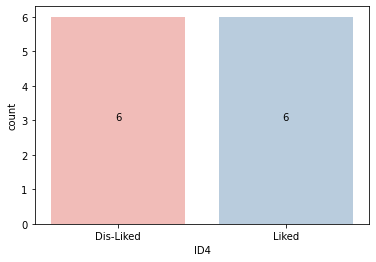

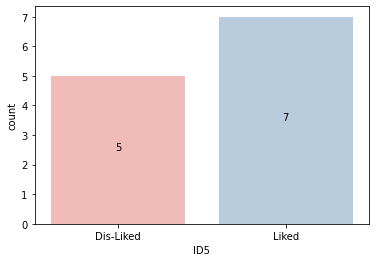

In [41]:
for i in ids.columns:
    ax = sns.countplot(ids[i])
    plt.xticks([0, 1], ['Dis-Liked', 'Liked'])
    plt.xlabel(i.upper())
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height/2,
                '{:1}'.format(height),
                ha="center")
    plt.show()

### **Insights for Food**

####  Order of Image ID liked
      
      3 = 5 > 4 > 1 = 2

---
####  **Food ID 3 & 5 have been attracted and 7 out of 12 people choosed both as their most liked adversitements And one more thing is Food ID 4 has same no of people liked and disliked**

---

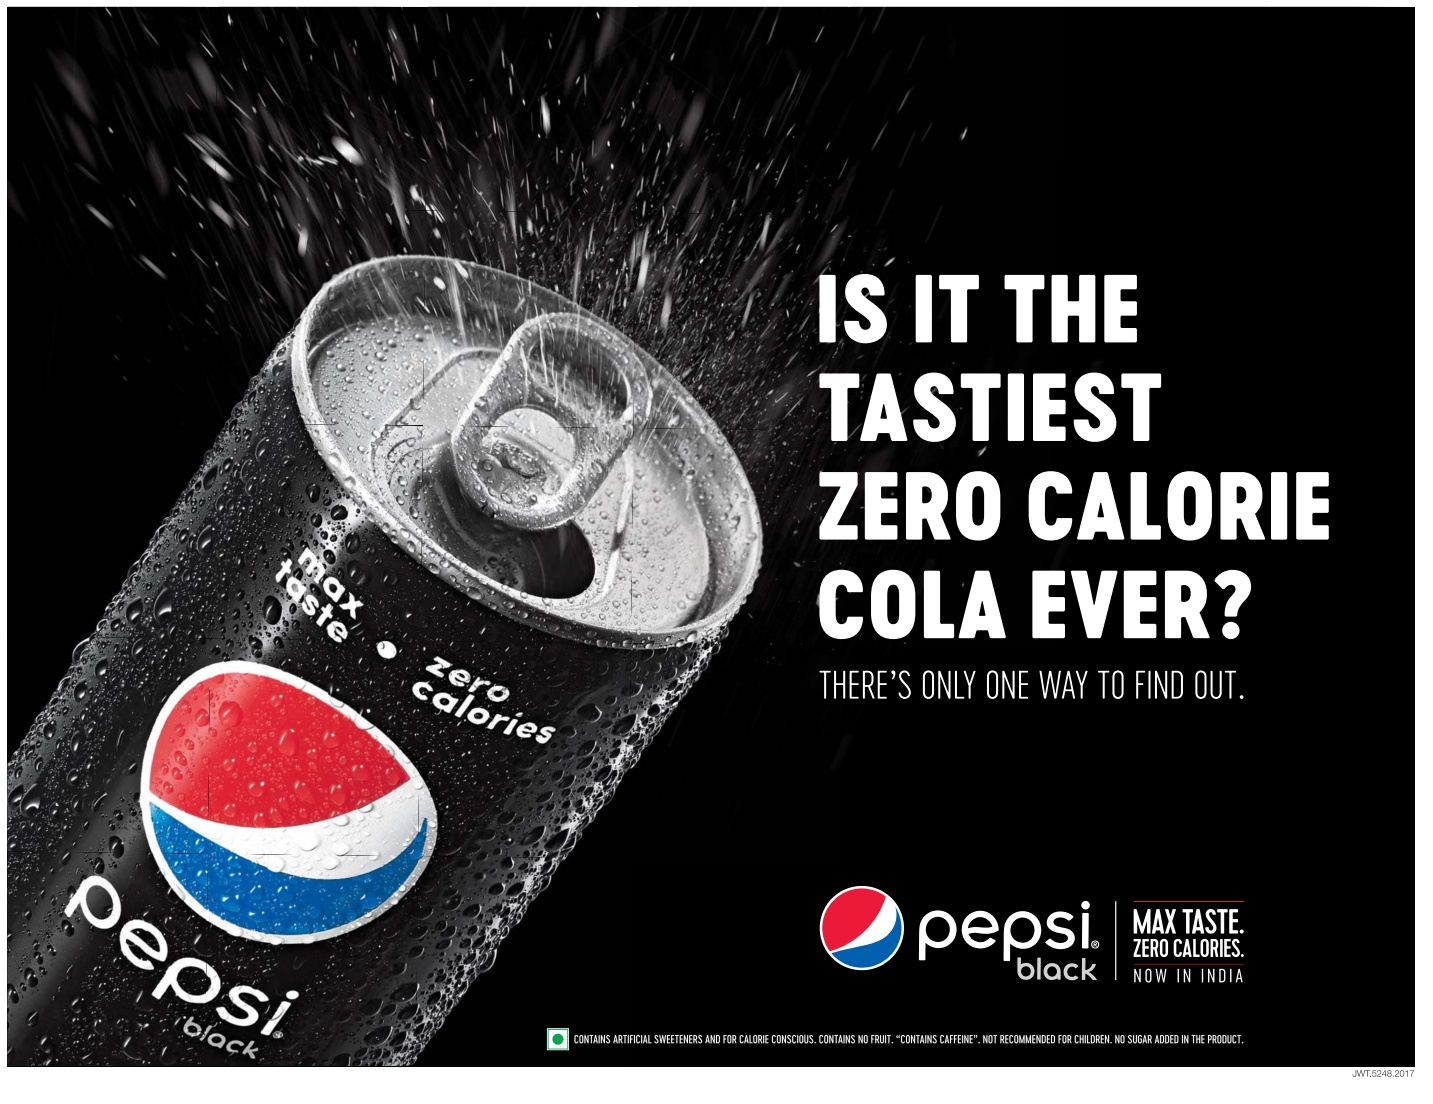

In [42]:
# from PIL import Image 
# from IPython.display import display

# im = Image.open('Posters(Ads)/food/food3.png')  
# display(im)

# im = Image.open('Posters(Ads)/food/food5.png')  
# display(im) 

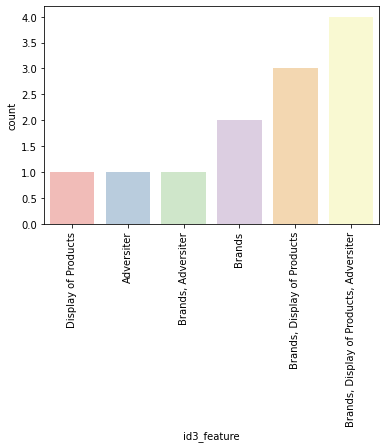

In [43]:
sns.countplot(food['id3_feature'], order = food['id3_feature'].value_counts(ascending=True).index)
plt.xticks(rotation=90)
plt.show()

In [44]:
food3 = food[['id3_feature', 'id3']]

In [45]:
food3.head()

,id3_feature,id3
0,"Brands, Display of Products, Adversiter",1
1,Brands,1
2,"Brands, Adversiter",1
3,"Brands, Display of Products, Adversiter",0
4,"Brands, Display of Products, Adversiter",1


In [46]:
food3['offers'] = food3['id3_feature'].apply(lambda x: 1 if 'offer' in x.lower() else 0)
food3['brand'] = food3['id3_feature'].apply(lambda x: 1 if 'brand' in x.lower() else 0)
food3['display_of_products'] = food3['id3_feature'].apply(lambda x: 1 if 'display of products' in x.lower() else 0)
food3['design'] = food3['id3_feature'].apply(lambda x: 1 if 'design' in x.lower() else 0)
food3['advertiser'] = food3['id3_feature'].apply(lambda x: 1 if 'advertiser' in x.lower() else 0)

In [47]:
food3.head()

,id3_feature,id3,offers,brand,display_of_products,design,advertiser
0,"Brands, Display of Products, Adversiter",1,0,1,1,0,0
1,Brands,1,0,1,0,0,0
2,"Brands, Adversiter",1,0,1,0,0,0
3,"Brands, Display of Products, Adversiter",0,0,1,1,0,0
4,"Brands, Display of Products, Adversiter",1,0,1,1,0,0


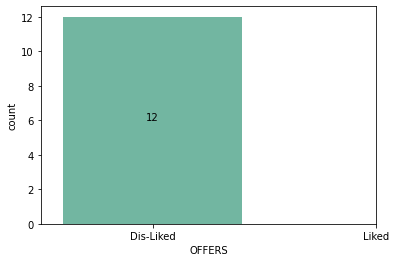

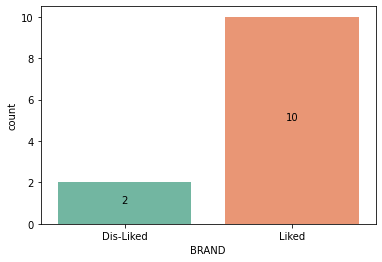

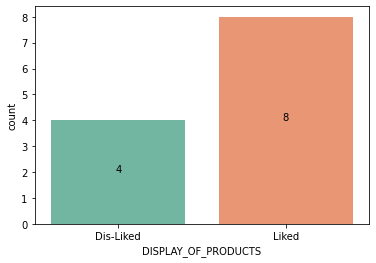

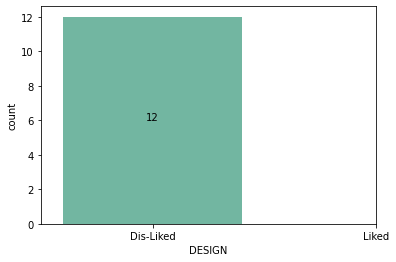

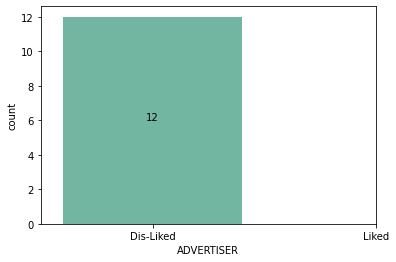

In [48]:
features = ['offers', 'brand', 'display_of_products',
              'design', 'advertiser']

for i in features:
    ax = sns.countplot(food3[i], palette = "Set2")
    plt.xticks([0, 1], ['Dis-Liked', 'Liked'])
    plt.xlabel(i.upper())
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height/2,
                '{:1}'.format(height),
                ha="center")
    plt.show()

### **Insights for Food**

### Order of features liked by people

    1.   Brand
    2.   Display of Product


---


### **Above plots clearly shows that "Brand" & "Display of Product" have attracted 8 out of 12 people** 


---



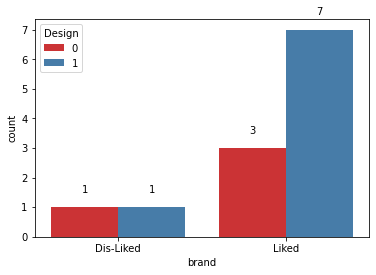

In [49]:
ax = sns.countplot(x='brand', hue='display_of_products', data=food3, palette='Set1')
ax.legend(title="Design")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.5,
            '{:1}'.format(height),
            ha="center")
    
plt.xticks([0, 1], ['Dis-Liked', 'Liked'])
plt.show()

In [50]:
df = poster_features.copy()

In [51]:
df[df['id'] == 'food3']

,id,category,brand,shop/company/advertiser,cost,offertype,no_of_product,location,online_stores,description_language,slogan_language,color_of_product,color_of_poster,partner,Unique feature,description,slogan,no_of_para
19,food3,food_bevarage,pepsi,pepsi,nil,no,1,both,"zomato, swiggy",english,english,black,black,no,Catchy ad,Arrival of new editioned product,There is only one way to find out,NaN
20,food3,food_fast,kfc,kfc,single,offertype6,5,both,"zomato, swiggy",english,english,wheatish brown,red,no,Combo,Introducing new offer,It's Finger licking good,NaN


In [52]:
attributes = df[df['id'] == 'food3'].reset_index(drop=True).T.to_dict()

In [53]:
# Attributes for Most Liked Mobile Advertisement
attributes[0]

{'Unique feature': 'Catchy ad',
 'brand': 'pepsi',
 'category': 'food_bevarage',
 'color_of_poster': 'black',
 'color_of_product': 'black',
 'cost': 'nil',
 'description': 'Arrival of new editioned product ',
 'description_language': 'english',
 'id': 'food3',
 'location': 'both',
 'no_of_para': nan,
 'no_of_product': '1',
 'offertype': 'no',
 'online_stores': 'zomato, swiggy',
 'partner': 'no',
 'shop/company/advertiser': 'pepsi',
 'slogan': 'There is only one way to find out',
 'slogan_language': 'english'}

In [54]:
best_features['food'] = attributes[0]

## Accessory

In [55]:
accessory.head()

,Feedback on Accessory Image ID 1,Feedback on Accessory Image ID 2,Feedback on Accessory Image ID 3,Feedback on Accessory Image ID 4,Feedback on Accessory Image ID 5,What are the posters/ads did you liked/preferred?
0,"Display of Products, Design","Offers, Display of Products, Design","Offers, Advertiser","Brand, Design, Advertiser","Offers, Display of Products","Accessory Image ID 4, Accessory Image ID 5"
1,Advertiser,"Brand, Advertiser",Offers,"Brand, Design","Offers, Display of Products, Design, Advertiser","Accessory Image ID 4, Accessory Image ID 5"
2,"Offers, Brand, Display of Products","Brand, Display of Products","Offers, Brand, Display of Products",Brand,Brand,"Accessory Image ID 2, Accessory Image ID 3, Ac..."
3,"Brand, Display of Products, Design","Brand, Display of Products","Offers, Brand, Display of Products, Advertiser","Brand, Design, Advertiser","Offers, Brand, Display of Products, Advertiser",Accessory Image ID 5
4,"Display of Products, Design","Display of Products, Advertiser",Offers,"Brand, Design","Design, Advertiser","Accessory Image ID 1, Accessory Image ID 4"


In [56]:
accessory.columns

Index(['Feedback on Accessory Image ID 1', 'Feedback on Accessory Image ID 2',
       'Feedback on Accessory Image ID 3', 'Feedback on Accessory Image ID 4',
       'Feedback on Accessory Image ID 5',
       'What are the posters/ads did you liked/preferred?'],
      dtype='object')

In [57]:
accessory = accessory.rename(columns = {'Feedback on Accessory Image ID 1': 'id1_feature', 
                                  'Feedback on Accessory Image ID 2': 'id2_feature',
                                  'Feedback on Accessory Image ID 3': 'id3_feature',
                                  'Feedback on Accessory Image ID 4': 'id4_feature',
                                  'Feedback on Accessory Image ID 5': 'id5_feature',
                                  'What are the posters/ads did you liked/preferred?': 'id'})

Text(0.5, 1.0, 'Combinations of Images')

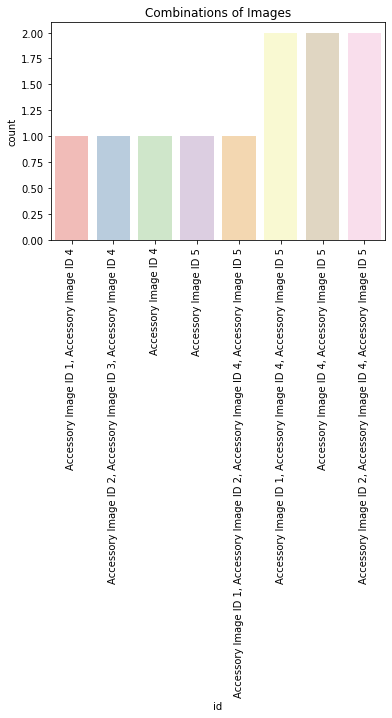

In [58]:
sns.countplot(accessory['id'], order = accessory['id'].value_counts(ascending=True).index)
plt.xticks(rotation=90)
plt.title('Combinations of Images')

In [59]:
accessory['id1'] = accessory['id'].apply(lambda x: 1 if '1' in str(x) else 0)
accessory['id2'] = accessory['id'].apply(lambda x: 1 if '2' in str(x) else 0)
accessory['id3'] = accessory['id'].apply(lambda x: 1 if '3' in str(x) else 0)
accessory['id4'] = accessory['id'].apply(lambda x: 1 if '4' in str(x) else 0)
accessory['id5'] = accessory['id'].apply(lambda x: 1 if '5' in str(x) else 0)

In [60]:
ids = accessory.iloc[:, 6:]

In [61]:
# for i in range(1, 6):
#     print(ids['id' + str(i)].value_counts(ascending=True))

In [62]:
sns.set_palette('Pastel1')

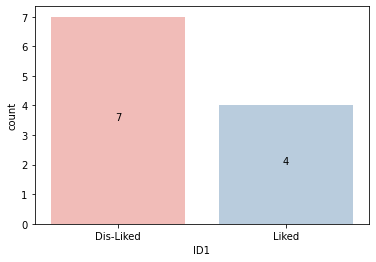

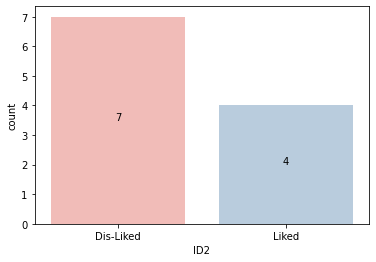

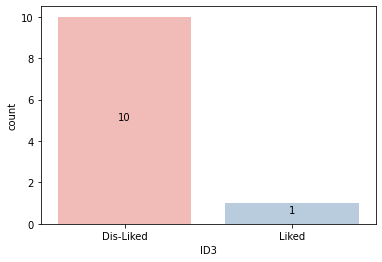

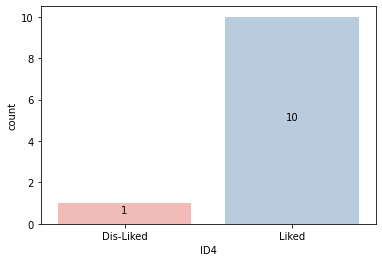

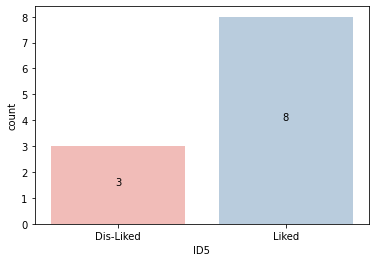

In [63]:
for i in ids.columns:
    ax = sns.countplot(ids[i])
    plt.xticks([0, 1], ['Dis-Liked', 'Liked'])
    plt.xlabel(i.upper())
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height/2,
                '{:1}'.format(height),
                ha="center")
    plt.show()

### **Insights for Accessory**

####  Order of Image ID liked
      
      4 > 5 > 1 = 2 > 3

---
####  **Within Accessories Ads Image ID 4 interestingly been attracted 10 out of 11 people. And excitely Image ID 3 is not even attract 2 people** 

---

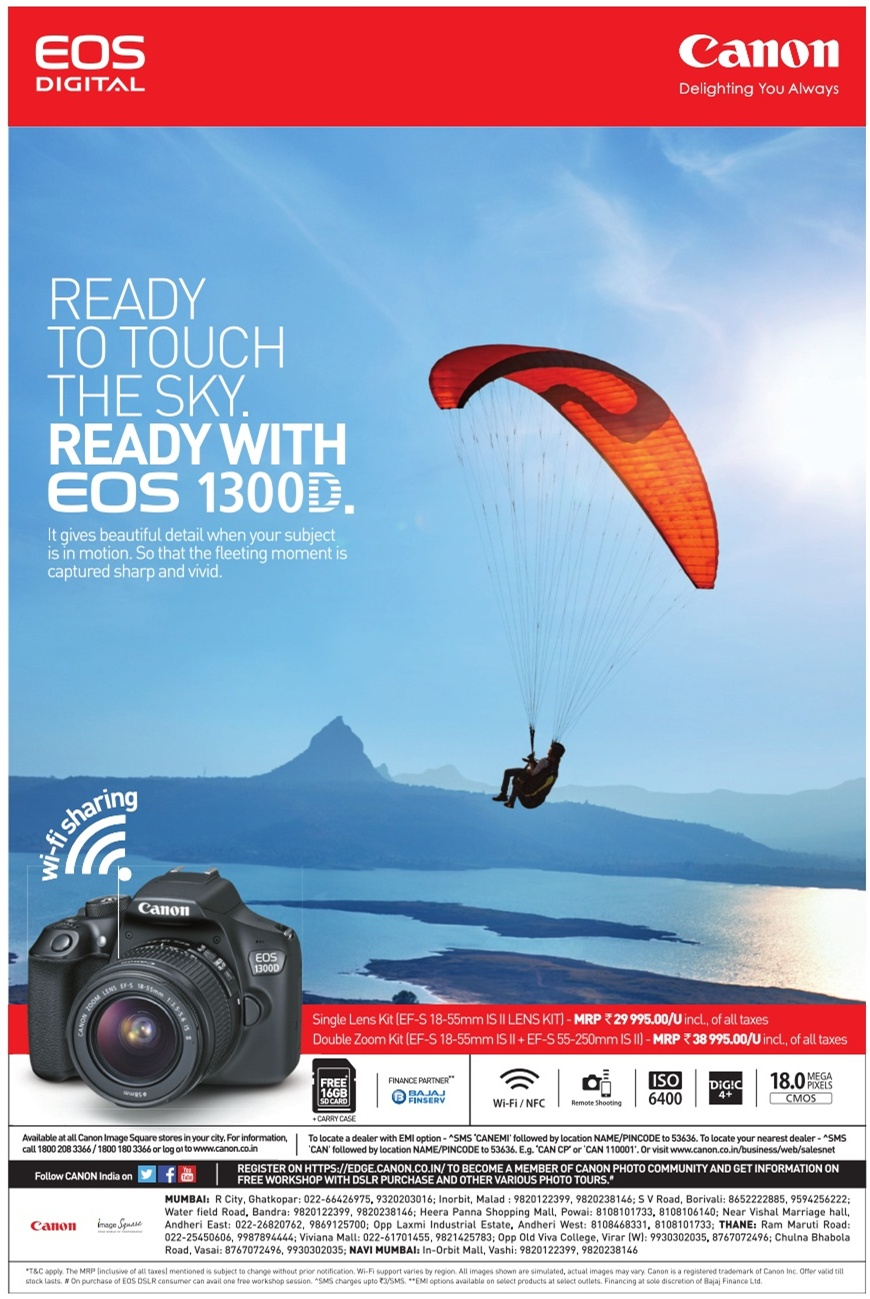

In [64]:
# from PIL import Image 
# from IPython.display import display

# im = Image.open('Posters(Ads)/accessory/accessory4.png')  
# display(im) 

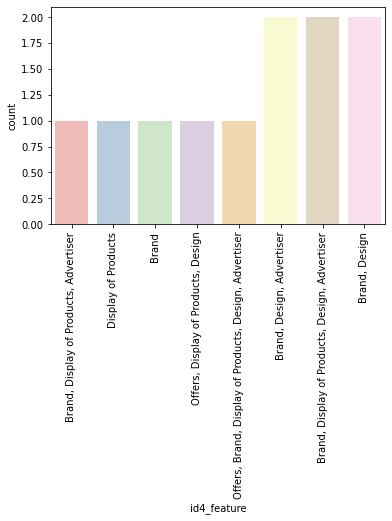

In [65]:
sns.countplot(accessory['id4_feature'], order = accessory['id4_feature'].value_counts(ascending=True).index)
plt.xticks(rotation=90)
plt.show()

In [66]:
accessory4 = accessory[['id4_feature', 'id4']]

In [67]:
accessory4.head()

,id4_feature,id4
0,"Brand, Design, Advertiser",1
1,"Brand, Design",1
2,Brand,1
3,"Brand, Design, Advertiser",0
4,"Brand, Design",1


In [68]:
accessory4['offers'] = accessory4['id4_feature'].apply(lambda x: 1 if 'offer' in x.lower() else 0)
accessory4['brand'] = accessory4['id4_feature'].apply(lambda x: 1 if 'brand' in x.lower() else 0)
accessory4['display_of_products'] = accessory4['id4_feature'].apply(lambda x: 1 if 'display of products' in x.lower() else 0)
accessory4['design'] = accessory4['id4_feature'].apply(lambda x: 1 if 'design' in x.lower() else 0)
accessory4['advertiser'] = accessory4['id4_feature'].apply(lambda x: 1 if 'advertiser' in x.lower() else 0)

In [69]:
accessory4.columns

Index(['id4_feature', 'id4', 'offers', 'brand', 'display_of_products',
       'design', 'advertiser'],
      dtype='object')

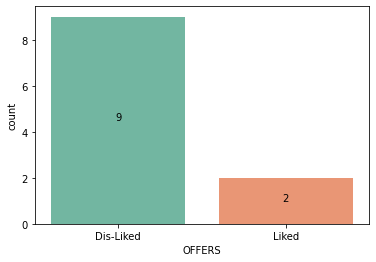

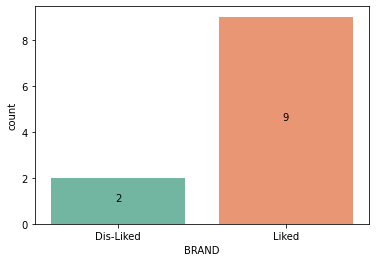

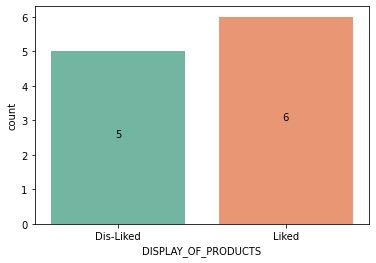

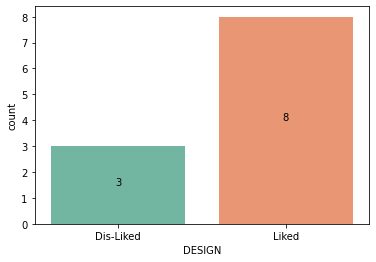

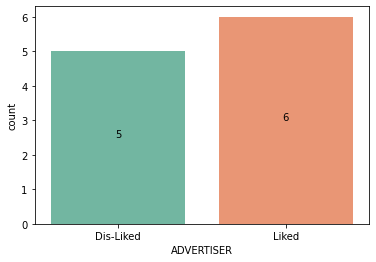

In [70]:
features = ['offers', 'brand', 'display_of_products',
              'design', 'advertiser']

for i in features:
    ax = sns.countplot(accessory4[i], palette = "Set2")
    plt.xticks([0, 1], ['Dis-Liked', 'Liked'])
    plt.xlabel(i.upper())
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height/2,
                '{:1}'.format(height),
                ha="center")
    plt.show()

### **Insights for Accessory**

### Order of features liked by people

    1.   Brand
    2.   Design
    3.   Display of Product
    4.   Adversiter


---


### **Eventhough Offers has not been provided in that Accessory Image ID 4, most people was attracted by other features like brand, design, display of product and adversiter**


---



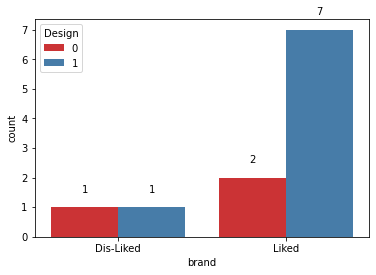

In [71]:
ax = sns.countplot(x='brand', hue='design', data=accessory4, palette='Set1')
ax.legend(title="Design")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.5,
            '{:1}'.format(height),
            ha="center")
    
plt.xticks([0, 1], ['Dis-Liked', 'Liked'])
plt.show()

In [72]:
df = poster_features.copy()

In [73]:
df[df['id'] == 'accessory4']

,id,category,brand,shop/company/advertiser,cost,offertype,no_of_product,location,online_stores,description_language,slogan_language,color_of_product,color_of_poster,partner,Unique feature,description,slogan,no_of_para
10,accessory4,accessory_camera,canon,canon,multiple,"offertype1, offertype3",2,both,company_website,english,english,black,blue,finance,NaN,NaN,Ready to touch sky,NaN


In [74]:
attributes = df[df['id'] == 'accessory4'].reset_index(drop=True).T.to_dict()

In [75]:
successful_features = attributes[0]

In [76]:
# Attributes for Most Liked Mobile Advertisement
successful_features

{'Unique feature': nan,
 'brand': 'canon',
 'category': 'accessory_camera',
 'color_of_poster': 'blue',
 'color_of_product': 'black',
 'cost': 'multiple',
 'description': nan,
 'description_language': 'english',
 'id': 'accessory4',
 'location': 'both',
 'no_of_para': nan,
 'no_of_product': '2',
 'offertype': 'offertype1, offertype3',
 'online_stores': 'company_website',
 'partner': 'finance',
 'shop/company/advertiser': 'canon',
 'slogan': 'Ready to touch sky',
 'slogan_language': 'english'}

In [77]:
best_features['accessory'] = successful_features

## Clothing

In [78]:
clothing.head()

,Feedback on Clothing Image ID 1,Feedback on Clothing Image ID 2,Feedback on Clothing Image ID 3,Feedback on Clothing Image ID 4,Feedback on Clothing Image ID 5,Feedback on Clothing Image ID 6,What are the posters/ads did you liked/preferred?
0,"Offers, Adversiter","Offers, Brands","Offers, Brands, Display of Products, Adversiter","Offers, Brands, Adversiter","Offers, Brands, Adversiter","Offers, Brands, Adversiter","Clothing Image ID 1, Clothing Image ID 2, Clot..."
1,Offers,"Offers, Brands, Adversiter","Offers, Brands, Adversiter","Brands, Adversiter",Adversiter,"Offers, Brands","Clothing Image ID 2, Clothing Image ID 3, Clot..."
2,"Brands, Adversiter","Offers, Adversiter","Brands, Display of Products, Adversiter","Display of Products, Adversiter","Display of Products, Adversiter","Brands, Adversiter",Clothing Image ID 3
3,Offers,"Offers, Brands","Offers, Brands","Offers, Brands",Nil,"Offers, Brands, Display of Products","Clothing Image ID 2, Clothing Image ID 6"
4,Offers,"Offers, Brands","Offers, Brands, Display of Products",Brands,No information,"Offers, Brands, Display of Products, Adversiter","Clothing Image ID 2, Clothing Image ID 3, Clot..."


In [79]:
clothing.columns

Index(['Feedback on Clothing Image ID 1', 'Feedback on Clothing Image ID 2',
       'Feedback on Clothing Image ID 3', 'Feedback on Clothing Image ID 4',
       'Feedback on Clothing Image ID 5', 'Feedback on Clothing Image ID 6',
       'What are the posters/ads did you liked/preferred?'],
      dtype='object')

In [80]:
clothing = clothing.rename(columns = {'Feedback on Clothing Image ID 1': 'id1_feature', 
                                  'Feedback on Clothing Image ID 2': 'id2_feature',
                                  'Feedback on Clothing Image ID 3': 'id3_feature',
                                  'Feedback on Clothing Image ID 4': 'id4_feature',
                                  'Feedback on Clothing Image ID 5': 'id5_feature',
                                  'Feedback on Clothing Image ID 6': 'id6_feature',
                                  'What are the posters/ads did you liked/preferred?': 'id'})

Text(0.5, 1.0, 'Combinations of Images')

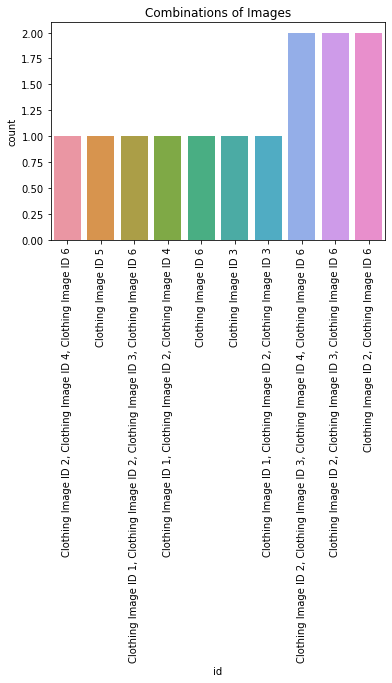

In [81]:
sns.countplot(clothing['id'], order = clothing['id'].value_counts(ascending=True).index)
plt.xticks(rotation=90)
plt.title('Combinations of Images')

In [82]:
clothing['id1'] = clothing['id'].apply(lambda x: 1 if '1' in str(x) else 0)
clothing['id2'] = clothing['id'].apply(lambda x: 1 if '2' in str(x) else 0)
clothing['id3'] = clothing['id'].apply(lambda x: 1 if '3' in str(x) else 0)
clothing['id4'] = clothing['id'].apply(lambda x: 1 if '4' in str(x) else 0)
clothing['id5'] = clothing['id'].apply(lambda x: 1 if '5' in str(x) else 0)
clothing['id6'] = clothing['id'].apply(lambda x: 1 if '6' in str(x) else 0)

In [83]:
ids = clothing.iloc[:, 7:]

In [84]:
ids.head()

,id1,id2,id3,id4,id5,id6
0,1,1,1,0,0,0
1,0,1,1,1,0,1
2,0,0,1,0,0,0
3,0,1,0,0,0,1
4,0,1,1,0,0,1


In [85]:
# for i in range(1, 7):
#     print(ids['id' + str(i)].value_counts(ascending=True))

In [86]:
sns.set_palette('Pastel1')

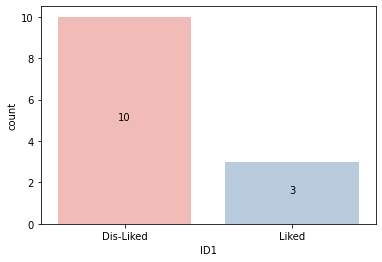

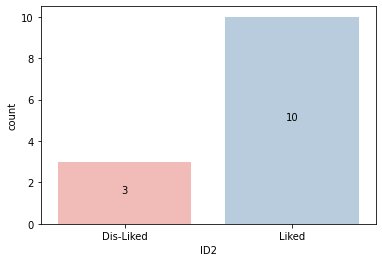

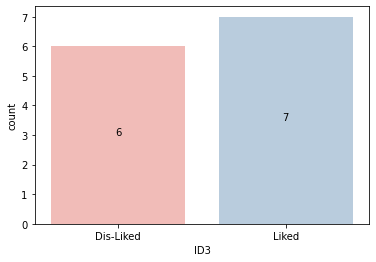

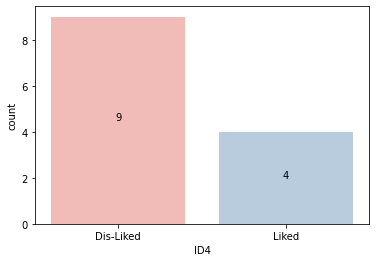

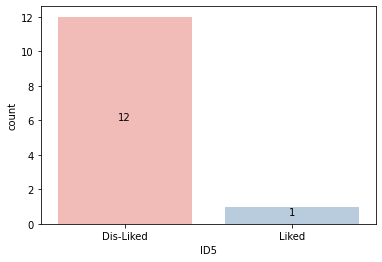

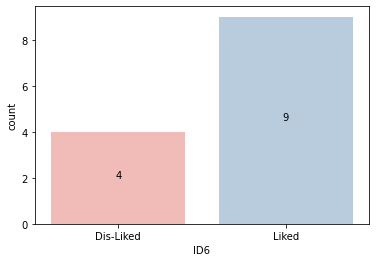

In [87]:
for i in ids.columns:
    ax = sns.countplot(ids[i])
    plt.xticks([0, 1], ['Dis-Liked', 'Liked'])
    plt.xlabel(i.upper())
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height/2,
                '{:1}'.format(height),
                ha="center")
    plt.show()

### **Insights for Clothing**

####  Order of Image ID liked
      
      2 > 6 > 3 > 4 > 1 > 5

---
####  **10 out of 13 people have choosed Clothing ID 2 as most liked advertisement. And Image ID 5 has not been chosen by most people too**

---

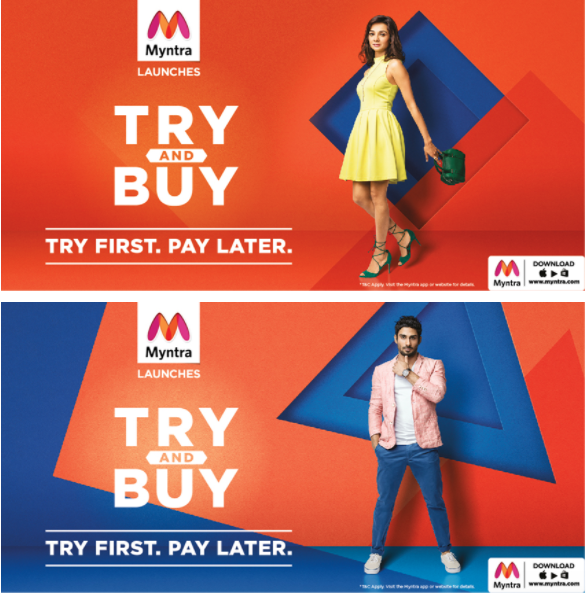

In [88]:
# from PIL import Image 
# from IPython.display import display

# im = Image.open('Posters(Ads)/clothing/clothing2.png')  
# display(im)

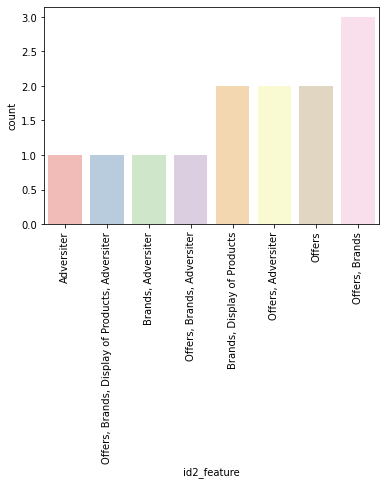

In [89]:
sns.countplot(clothing['id2_feature'], order = clothing['id2_feature'].value_counts(ascending=True).index)
plt.xticks(rotation=90)
plt.show()

In [90]:
clothing2 = clothing[['id2_feature', 'id2']]

In [91]:
clothing2.head()

,id2_feature,id2
0,"Offers, Brands",1
1,"Offers, Brands, Adversiter",1
2,"Offers, Adversiter",0
3,"Offers, Brands",1
4,"Offers, Brands",1


In [92]:
clothing2['offers'] = clothing2['id2_feature'].apply(lambda x: 1 if 'offer' in x.lower() else 0)
clothing2['brand'] = clothing2['id2_feature'].apply(lambda x: 1 if 'brand' in x.lower() else 0)
clothing2['display_of_products'] = clothing2['id2_feature'].apply(lambda x: 1 if 'display of products' in x.lower() else 0)
clothing2['design'] = clothing2['id2_feature'].apply(lambda x: 1 if 'design' in x.lower() else 0)
clothing2['advertiser'] = clothing2['id2_feature'].apply(lambda x: 1 if 'advertiser' in x.lower() else 0)

In [93]:
clothing2.head()

,id2_feature,id2,offers,brand,display_of_products,design,advertiser
0,"Offers, Brands",1,1,1,0,0,0
1,"Offers, Brands, Adversiter",1,1,1,0,0,0
2,"Offers, Adversiter",0,1,0,0,0,0
3,"Offers, Brands",1,1,1,0,0,0
4,"Offers, Brands",1,1,1,0,0,0


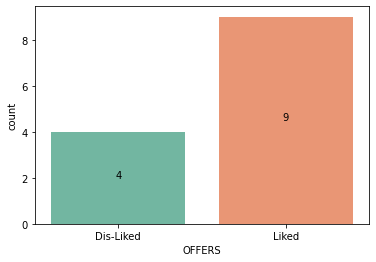

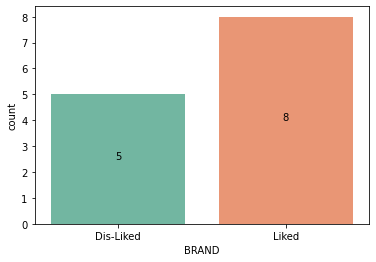

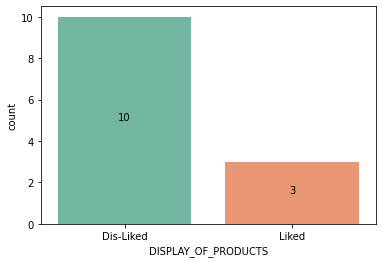

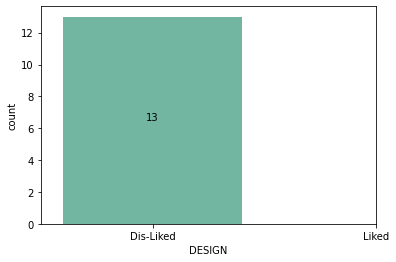

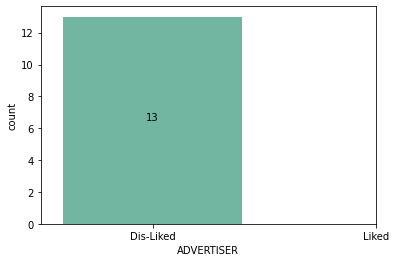

In [94]:
features = ['offers', 'brand', 'display_of_products',
              'design', 'advertiser']

for i in features:
    ax = sns.countplot(clothing2[i], palette = "Set2")
    plt.xticks([0, 1], ['Dis-Liked', 'Liked'])
    plt.xlabel(i.upper())
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2., height/2,
                '{:1}'.format(height),
                ha="center")
    plt.show()

### **Insights for Clothing**

### Order of features liked by people

    1.   Offers
    2.   Brand


---


### **Main things noted from above plots are most of the people have been attracted only by Offers and Brand. Other features like Poster Design, Display of product in this Clothing Image ID 2 didn't play much role**


---



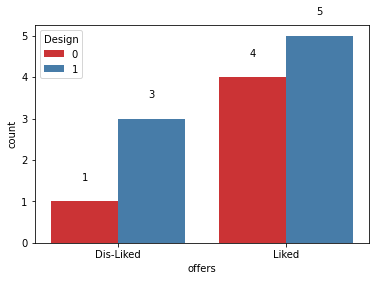

In [95]:
ax = sns.countplot(x='offers', hue='brand', data=clothing2, palette='Set1')
ax.legend(title="Design")

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.5,
            '{:1}'.format(height),
            ha="center")
    
plt.xticks([0, 1], ['Dis-Liked', 'Liked'])
plt.show()

In [96]:
df = poster_features.copy()

In [97]:
df[df['id'] == 'clothing2']

,id,category,brand,shop/company/advertiser,cost,offertype,no_of_product,location,online_stores,description_language,slogan_language,color_of_product,color_of_poster,partner,Unique feature,description,slogan,no_of_para
13,clothing2,clothing_adult,myntra,instagram,nil,no,2,online,Myntra,english,english,mulitcolor,"orange, blue",no,Trial n error concept,NaN,Nil,NaN


In [98]:
attributes = df[df['id'] == 'clothing2'].reset_index(drop=True).T.to_dict()

In [99]:
# Attributes for Most Liked Mobile Advertisement
attributes[0]

{'Unique feature': 'Trial n error concept',
 'brand': 'myntra',
 'category': 'clothing_adult',
 'color_of_poster': 'orange, blue',
 'color_of_product': 'mulitcolor',
 'cost': 'nil',
 'description': nan,
 'description_language': 'english',
 'id': 'clothing2',
 'location': 'online',
 'no_of_para': nan,
 'no_of_product': '2',
 'offertype': 'no',
 'online_stores': 'Myntra',
 'partner': 'no',
 'shop/company/advertiser': 'instagram',
 'slogan': 'Nil',
 'slogan_language': 'english'}

In [100]:
best_features['clothing'] = attributes[0]

# Final Insights

## **Insights for Mobile**

  Order of Image ID liked
      
      3 > 2 > 1 = 4 > 5

---
  **Mobile ID 3 has been attracted and 16 out of 23 people choosed it as their most liked adversitement**

---

 Order of features liked by people

    1.   Brand
    2.   Display of Product
    3.   Design


---


 **18 people was attracted by brand. At second 14 people liked the simple display of product and 12 goes for design model**


---

## **Insights for Food**

  Order of Image ID liked
      
      3 = 5 > 4 > 1 = 2

---
  **Food ID 3 & 5 have been attracted and 7 out of 12 people choosed both as their most liked adversitements And one more thing is Food ID 4 has same no of people liked and disliked**

---

 Order of features liked by people

    1.   Brand
    2.   Display of Product


---

 **Above plots clearly shows that "Brand" & "Display of Product" have attracted 8 out of 12 people** 


---



## **Insights for Accessory**

  Order of Image ID liked
      
      4 > 5 > 1 = 2 > 3

---
  **Within Accessories Ads Image ID 4 interestingly been attracted 10 out of 11 people. And excitely Image ID 3 is not even attract 2 people** 

---

 Order of features liked by people

    1.   Brand
    2.   Design
    3.   Display of Product
    4.   Adversiter


---

 **Eventhough Offers has not been provided in that Accessory Image ID 4, most people was attracted by other features like brand, design, display of product and adversiter**


---



## **Insights for Clothing**

 Order of Image ID liked
      
      2 > 6 > 3 > 4 > 1 > 5

---
  **10 out of 13 people have choosed Clothing ID 2 as most liked advertisement. And Image ID 5 has not been chosen by most people too**

---

 Order of features liked by people

    1.   Offers
    2.   Brand


---


 **Main things noted from above plots are most of the people have been attracted only by Offers and Brand. Other features like Poster Design, Display of product in this Clothing Image ID 2 didn't play much role**


---



In [101]:
# Display of Best Features 

best_features['mobile']

{'Unique feature': nan,
 'brand': 'oneplus',
 'category': 'mobile',
 'color_of_poster': 'white',
 'color_of_product': 'blue, black',
 'cost': 'nil',
 'description': nan,
 'description_language': 'english',
 'id': 'mobile3',
 'location': 'both',
 'no_of_para': nan,
 'no_of_product': '2',
 'offertype': 'offertype1',
 'online_stores': 'company_website, amazon',
 'partner': 'electronic_shop',
 'shop/company/advertiser': 'own_store',
 'slogan': 'nil',
 'slogan_language': 'no'}

In [102]:
best_features['food']

{'Unique feature': 'Catchy ad',
 'brand': 'pepsi',
 'category': 'food_bevarage',
 'color_of_poster': 'black',
 'color_of_product': 'black',
 'cost': 'nil',
 'description': 'Arrival of new editioned product ',
 'description_language': 'english',
 'id': 'food3',
 'location': 'both',
 'no_of_para': nan,
 'no_of_product': '1',
 'offertype': 'no',
 'online_stores': 'zomato, swiggy',
 'partner': 'no',
 'shop/company/advertiser': 'pepsi',
 'slogan': 'There is only one way to find out',
 'slogan_language': 'english'}

In [103]:
best_features['accessory']

{'Unique feature': nan,
 'brand': 'canon',
 'category': 'accessory_camera',
 'color_of_poster': 'blue',
 'color_of_product': 'black',
 'cost': 'multiple',
 'description': nan,
 'description_language': 'english',
 'id': 'accessory4',
 'location': 'both',
 'no_of_para': nan,
 'no_of_product': '2',
 'offertype': 'offertype1, offertype3',
 'online_stores': 'company_website',
 'partner': 'finance',
 'shop/company/advertiser': 'canon',
 'slogan': 'Ready to touch sky',
 'slogan_language': 'english'}

In [104]:
best_features['clothing']

{'Unique feature': 'Trial n error concept',
 'brand': 'myntra',
 'category': 'clothing_adult',
 'color_of_poster': 'orange, blue',
 'color_of_product': 'mulitcolor',
 'cost': 'nil',
 'description': nan,
 'description_language': 'english',
 'id': 'clothing2',
 'location': 'online',
 'no_of_para': nan,
 'no_of_product': '2',
 'offertype': 'no',
 'online_stores': 'Myntra',
 'partner': 'no',
 'shop/company/advertiser': 'instagram',
 'slogan': 'Nil',
 'slogan_language': 'english'}

***Best attributes for all 4 categories have been displayed which can be compared with the poster/advertisement before posting or being shared***